In [1]:
# работа с данными
import pandas as pd
import numpy as np

# для графиков
import seaborn as sns
import matplotlib.pyplot as plt

# нормализация
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# работа с файлами
import os

from scipy.stats import skew, kurtosis
from scipy.stats import trim_mean, trimboth, tmean, tstd, ttest_1samp, gmean, hmean, mode
from scipy.stats import percentileofscore, scoreatpercentile
import statistics

from collections import Counter

In [2]:
from scipy.signal import find_peaks

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import Lasso 

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import Sequential
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# import random

from scipy import stats
from scipy.stats import ttest_ind

from sklearn.preprocessing import PolynomialFeatures

# Const

In [4]:
feature = ['Дальность', 'Основное положение к регистратору', 'Наименование файла', 'Тип объекта']

# Создание словаря для типа техники
type_dict = {
    'гусеничная техника': 0,
    'колесная техника': 1,
}

# Создание словаря для направления движения
direction_dict = {
    'влево': 0,
    'фронтальное': 0,
    'фронтальное (влево)': 0,
    'фронтальное (вправо)': 0,
    'облическое': 1,
    'облическое ': 1,
    'фронтально-облическое' : 2,
    'фронтально-облическое (влево)': 2,
    'фронтально-облически (влево)': 2,
    'фронтально-облическое (вправо)': 2,
    'кормовое': 3,
    'фронтально-кормовое': 4,
    'фронтально-кормовое (влево)': 4,
    'фронтально-кормовое (вправо)' : 4,
    'разворот': 5
}

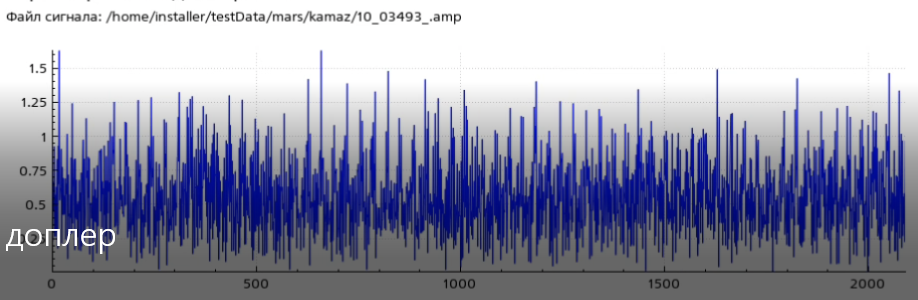

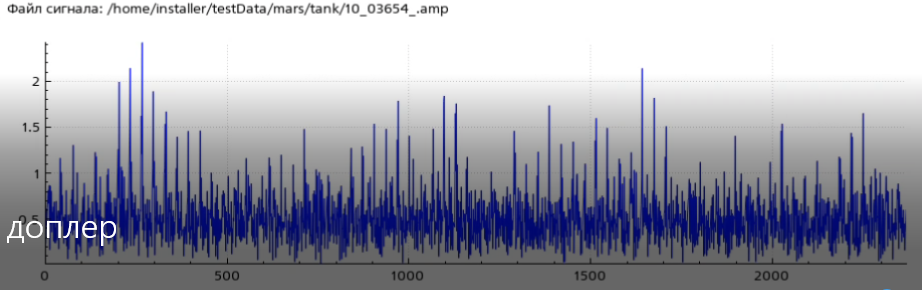

# Функции

In [5]:
# Среднее (Mean)
# Доверительный интервал (Confidence Interval)
# Доверительный интервал (Confidence Interval)
# Обрезанное среднее (Trimmed Mean)
# Усеченное среднее (Winsorized Mean)
# Тест Граббса (Grubbs Test)
# p-значение (p-value)
# Геометрическое среднее (Geometric Mean)
# Гармоническое среднее (Harmonic Mean)
# Медиана (Median)
# Мода (Mode)
# Частота (Frequency)
# Сумма (Sum)
# Минимум (Minimum)
# Максимум (Maximum)
# Нижний квартиль (Lower Quartile)
# Верхний квартиль (Upper Quartile)
# Процентиль (Percentile)
# Процентиль (Percentile)
# Размах (Range)
# Квартиль (Quartile)
# Дисперсия (Variance)
# Стандартное отклонение (Standard Deviation)
# Стандартное отклонение (Standard Deviation)
# Коэффициент вариации (Coefficient of Variation)
# Стандартизированное (Standardized)
# Асимметрия (Skewness)
# Стандартная ошибка (Standard Error)
# Куртозис (Kurtosis)
# Стандартная ошибка (Standard Error)

In [6]:
# Межквартильный диапазон (IQR):
def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

# Стандартное отклонение от среднего
def detect_outliers_std(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    outliers = [x for x in data if abs(x - mean) > threshold * std]
    return outliers

In [7]:
# # Ящик с усами (boxplot)
# def plot_boxplot_with_outliers(data):
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=data)
#     plt.title("Boxplot с выбросами")
#     plt.xlabel("Data")
#     plt.ylabel("Values")
#     plt.show()

# # Пример использования
# data = df['Mean']
# plot_boxplot_with_outliers(data)

In [8]:
def getAnamalies(data):
    print("Мин-сред-макс:", np.min(data), round(np.mean(data), 3), np.max(data))
    
    # Межквартильный диапазон (IQR):
    outliers_quer = detect_outliers_iqr(data)
    # print("Выбросы по методу IQR:", outliers_quer)
    index_quer = [i for i, length in enumerate(data) if length in outliers_quer]
    # print("Выбросы по методу IQR:", index_quer)
    
    # Стандартное отклонение от среднего
    outliers_std = detect_outliers_std(data)
    # print("Выбросы по методу std-err:", outliers_std)
    index_std = [i for i, length in enumerate(data) if length in outliers_std]
    # print("Выбросы по методу IQR:", index_std)
    
    # Получение значений, которые входят в оба массива
    common_values = set(index_quer).intersection(set(index_std))
    common_values = None if common_values == set() else common_values
    # print("Индексы выбросов:", common_values)

    # print("Кол-во выбросов:", len(common_values) if common_values else 0, '/', len(data))
    # for index in common_values:
    #     print("Индекс:", index, "Значение:", data[index])

    print("Кол-во выбросов, индексы:", len(common_values) if common_values else 0, '/', len(data), common_values)
    
    return common_values

def getAnamaliesInDF(df):
    index_keys_array = []
    for key in df.keys():
        if key == 'id' or key == 'len': continue
        print('\n', key)
        data = df[key]
        index_keys_array.append(getAnamalies(data))

    # Подсчет количества встречаемых выбросов
    outliers = [outliers for outliers in index_keys_array if outliers is not None]
    all_outliers = set().union(*outliers)
    outliers_counter = Counter(outlier for sublist in outliers for outlier in sublist)
    print("Статистика по выбросам:")
    for outlier, frequency in outliers_counter.items():
        print(f"Выброс: {outlier}, кол-во: {frequency}")

In [9]:
def saveCsvFile(df, filename):
    df.to_csv(filename, index=False, sep=';', encoding='utf-8-sig')

# Загрузка исходных данных

### Загрузка таблицы за весну

In [10]:
df = pd.read_csv(f'mars_rls_data_spring.csv', sep=";", encoding='utf8') #, low_memory=False)
print(len(df))
df_spring = df[feature].copy()
df_spring.head(2)

3561


,Дальность,Основное положение к регистратору,Наименование файла,Тип объекта
0,4255,фронтально-облически (влево),kamaz_tent_2023_04_26_12_13_54_4255.amp,Колесная техника
1,3623,фронтально-облически (влево),kamaz_tent_2023_04_26_12_18_52_3623.amp,Колесная техника


In [11]:
print(df_spring['Тип объекта'].str.lower().value_counts(), '\n')
df_spring['Тип объекта'] = df_spring['Тип объекта'].str.lower().replace(type_dict)
print(df_spring['Тип объекта'].value_counts(), '\n')

print(df_spring['Основное положение к регистратору'].str.lower().value_counts(), '\n')
df_spring['Основное положение к регистратору'] = df_spring['Основное положение к регистратору'].str.lower().replace(direction_dict).copy()
print(df_spring['Основное положение к регистратору'].value_counts())

колесная техника      1873
гусеничная техника    1688
Name: Тип объекта, dtype: int64 

1    1873
0    1688
Name: Тип объекта, dtype: int64 

фронтально-облическое (влево)     864
фронтально-кормовое (вправо)      740
фронтальное (влево)               461
кормовое                          379
фронтальное (вправо)              320
фронтально-кормовое (влево)       260
фронтально-облическое (вправо)    252
облическое                        145
облическое                        137
фронтально-облически (влево)        2
влево                               1
Name: Основное положение к регистратору, dtype: int64 

2    1118
4    1000
0     782
3     379
1     282
Name: Основное положение к регистратору, dtype: int64


In [12]:
df_spring.head(2)

,Дальность,Основное положение к регистратору,Наименование файла,Тип объекта
0,4255,2,kamaz_tent_2023_04_26_12_13_54_4255.amp,1
1,3623,2,kamaz_tent_2023_04_26_12_18_52_3623.amp,1


### Загрузка сигналов из разных файлов

In [61]:
def find_file_by_name(dir, filename):
    if not os.path.exists(dir):
        print(f"Директория '{dir}' не существует.")
        return None

    for file in dir_files_spring:
        if file == filename:
            return os.path.join(dir, file)
    
    print(f"Файл не найден '{os.path.join(dir, file)}'.")
    return None

In [62]:
dir_path_spring = './spring/annotations'
dir_files_spring = [f for f in os.listdir(dir_path_spring) if os.path.isfile(os.path.join(dir_path_spring, f))]
print('spring', len(dir_files_spring))

spring 3565


In [63]:
def read_data_from_files(df, dir_path):
    for i, row in df.iterrows():
        file_name = row['Наименование файла']
        if file_name == "-":
            continue
            
        file_path = find_file_by_name(dir_path, file_name + '.txt')
        if file_path is None:
            continue
       
        file = open(file_path, mode='r')
        data_signal = file.read().split(';')
        file.close()
        list_signals.append([int(row['Тип объекта']), int(row['Основное положение к регистратору']), (row['Дальность'])] + data_signal[:-1])

In [64]:
list_signals = []

read_data_from_files(df_spring, dir_path_spring)
len(list_signals)

3561

# Получение признаков

### Причесываем длинну сигналов

Сред. знач. 2388


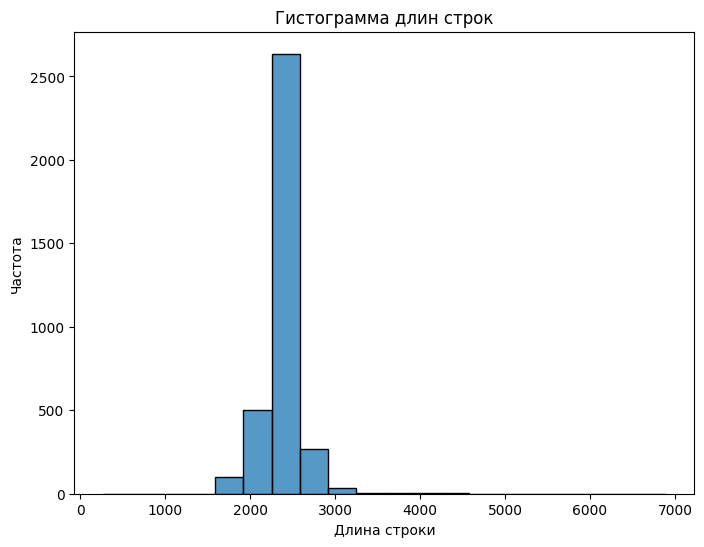

In [17]:
signal_lengths = [len(signal) for signal in list_signals]
mean_len = int(np.mean(signal_lengths))
print('Сред. знач.', mean_len)
     
# опред.сред длинну
plt.figure(figsize=(8, 6))
sns.histplot(signal_lengths, bins=20)  
plt.title("Гистограмма длин строк")
plt.xlabel("Длина строки"), plt.ylabel("Частота")
plt.show()

In [72]:
const_len = int(mean_len * 0.70)
print('const_len', const_len)

print('удалить', sum(1 for signal in list_signals if len(signal) < const_len))

const_len 1671
удалить 10


In [73]:
list_array = []
for signal in list_signals:
    if len(signal) < const_len:
        # print(len(signal), 'Выброс удален')
        continue
    else:
        list_array.append(signal[:const_len-1])      
    
print(len(list_signals), '-->', len(list_array))

3561 --> 3551


In [74]:
# ds_signals_df = pd.DataFrame(list_array).transpose()
# ds_signals_df.to_csv('dopler_signals_all_dataset.csv', index=False, sep=';', encoding='utf-8-sig')

### Расчет статистики

In [115]:
def getStatisticaValue(data):
    min_value = np.min(data)
    max_value = np.max(data)
    mediana_value = np.median(data)
    
    mean_value = np.mean(data) 
    geometric_mean = gmean(data)  # Геометрическое среднее
    harmonic_mean = hmean(data)   # Гармоническое среднее     

    mode_value = mode(data).mode       # Мода
    frequency = mode(data).count       # Частота
    data_sum = sum(data)               # Сумма
    data_range = max_value -min_value  # Размах
    
    value_quantile = np.quantile(data, [1/4, 3/4])  # 25-й и 75-й процентиль
    lower_quartile = percentileofscore(data, value_quantile[0])  # Нижний квартиль
    upper_quartile = percentileofscore(data, value_quantile[1])  # Верхний квартиль
    
    var_value = np.var(data)    # Дисперсия
    skew_value = skew(data)     # Асимметрия
    kurt_value = kurtosis(data) # Куртозис

    std_value = np.std(data) # Стандартная отклонение (Standard Error)
    coef_of_variation = std_value / mean_value  # Коэффициент вариации
    std_error = std_value / np.sqrt(len(data))  # Стандартная ошибка

    # confidence_interval = tmean(data), tstd(data)  # Доверительный интервал    
    grubbs_test, p_value = ttest_1samp(data, tmean(data))  # Тест Граббса (Grubbs Test) и p-значение
    
    d_top = max_value-mediana_value
    d_bottom = mediana_value-min_value
    
    statistic = [
        min_value, max_value, mediana_value, d_bottom, d_top, d_top-d_bottom,
        mean_value, geometric_mean, harmonic_mean, 
        mode_value, frequency, data_sum, data_range, 
        # value_quantile[0], value_quantile[1], 
        value_quantile[0], value_quantile[1],
        var_value, skew_value, kurt_value,
        std_value, coef_of_variation, std_error,
        grubbs_test, p_value
    ]


    koef_round = 3
    statistic_rounded = [round(element, koef_round) if isinstance(element, (int, float)) else element for element in statistic]
    
    return statistic_rounded

In [76]:
def signalsPeaks(data):
    # print(data)
    # signal = data[0][3:-1]
    # signal = [float(item) for item in signal]
    signal = np.array(data)
    peaks, _ = find_peaks(signal)
    
    # rise_times = []
    # fall_times = []    
    # for peak_index in peaks:
    #     peak_value = signal[peak_index] # значение пика
    
    #     # Находим индекс, когда сигнал пересекает 10% и 90% от значения пика
    #     rise_level = 0.1 * peak_value
    #     fall_level = 0.9 * peak_value
    
    #     # Находим индекс, когда сигнал пересекает уровни времени нарастания
    #     rise_index = np.where(signal[:peak_index] >= rise_level)[0][-1]  # Последний индекс, когда сигнал стал больше 10% от значения пика
        
    #     # Проверяем, есть ли значения сигнала после пика для вычисления fall_index
    #     if len(signal[peak_index:]) > 0:
    #         fall_indices = np.where(signal[peak_index:] <= fall_level)[0]
    #         if len(fall_indices) > 0:
    #             fall_index = fall_indices[0] + peak_index  # Первый индекс, когда сигнал стал меньше 90% от значения пика
    #         else:
    #             continue  # Пропускаем пики, для которых нет значений после
    #     else:
    #         continue  # Пропускаем пики, для которых нет значений после
        
    #     # # Вычисляем время нарастания и спада
    #     # rise_time = time[rise_index]
    #     # fall_time = time[fall_index]
    
    #     rise_times.append(rise_index)
    #     fall_times.append(fall_index)
    
    # print("Среднее время нарастания:", np.mean(rise_times))
    # print("Среднее время спада:", np.mean(fall_times))

    results = [
        # np.mean(rise_times), np.mean(fall_times),
        len(peaks), np.mean(peaks)
    ]

    koef_round = 3
    results_rounded = [round(element, koef_round) if isinstance(element, (int, float)) else element for element in results]
    
    return results_rounded

In [116]:
def getStatisticaTable(list_array):
    # # заготовка под графики
    # num = 3
    # num_rows = (len(list_array) + num - 1) // num
    # fig, axes = plt.subplots(num_rows, num, figsize=(15, 5*num_rows))
    # axes = axes.flatten()
    
    # cписок по статистике
    statistic = []      
    # data = []
    # index = 0
    for row in list_array:
        class_id = row[0]
        direction = row[1]
        distance = row[2]
        str_data = row[3:-2]
    
        data = [float(item) for item in str_data]  # Преобразуем строки в числа
        # data = [x for x in data if x <= 30] # Фильтр выбросов
        # statistic.append([int(class_id), len(data)] + getStatisticaValue(data))
        statistic.append([int(class_id), int(direction), int(distance), len(data)] + signalsPeaks(data) + getStatisticaValue(data))
    
        # sns.histplot(x=data, ax=axes[index])
        # axes[index].set_title(f'Histogram {index}')
        # index += 1
        # break
    
    df = pd.DataFrame(statistic, columns=[
        'id', 'direction', 'distance', 'len', 
        # 't нарастания', 't спада',
        'Кол-во пиков', 'Сред.зн.пика',
        'Min', 'Max', 'Медиана', 'Смещение низ', 'Смещение верх', 'Смещение',
        'Mean', 'Геом.сред.', 'Гарм.сред.', #'Обрез.сред.', 'Усеч.сред.', 
        'Мода', 'Частота', 'Сумма', 'Размах', 
        # '25 процентиль', '75 процентиль', 
        'Ниж.квартиль', 'Верх.квартиль',
        'Дисперсия', 'Асимметрия', 'Куртозис',
        'Std откл.', ' Коэф.вариации', 'Std ошибка',
        'Тест Граббса', 'p_value'
    ])
    # plt.tight_layout()
    # plt.show()

    return df

In [117]:
df = getStatisticaTable(list_array)
print("Распределение классов:")
print(df['id'].value_counts()) # проверка на кол-во классов
print("Распределение направлений:")
print(df['direction'].value_counts()) # проверка на кол-во классов
df.head(3)

Распределение классов:
1    1864
0    1687
Name: id, dtype: int64
Распределение направлений:
2    1116
4     997
0     779
3     377
1     282
Name: direction, dtype: int64


,id,direction,distance,len,Кол-во пиков,Сред.зн.пика,Min,Max,Медиана,Смещение низ,...,Ниж.квартиль,Верх.квартиль,Дисперсия,Асимметрия,Куртозис,Std откл.,Коэф.вариации,Std ошибка,Тест Граббса,p_value
0,1,2,4255,1665,358,841.520,2.451,4.942,3.655,1.204,...,3.130,4.116,0.371,0.077,-1.048,0.609,0.167,0.015,0.0,1.0
1,1,2,3623,1665,317,842.792,2.605,5.389,4.006,1.402,...,3.313,4.517,0.487,-0.051,-1.139,0.698,0.177,0.017,0.0,1.0
2,1,3,3702,1665,337,823.549,2.990,5.971,4.350,1.360,...,3.724,5.042,0.569,0.035,-1.221,0.754,0.173,0.018,0.0,1.0


In [118]:
df.to_csv('./datasets/spring_dataset.csv', index=False, sep=';', encoding='utf-8-sig')
data = df.copy()

### Категориальные признаки

In [80]:
direction_dummies = pd.get_dummies(data['direction'])
direction_dummies

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
3546,1,0,0,0,0
3547,1,0,0,0,0
3548,1,0,0,0,0
3549,1,0,0,0,0


In [81]:
df_dummies = pd.DataFrame({
    'X0': direction_dummies.iloc[:, 0].values,
    'X1': direction_dummies.iloc[:, 1].values,
    'X2': direction_dummies.iloc[:, 2].values,
    'X3': direction_dummies.iloc[:, 3].values,
    'X4': direction_dummies.iloc[:, 4].values,
    # 'X5': direction_dummies.iloc[:, 5].values
})
df_dummies

,X0,X1,X2,X3,X4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
3546,1,0,0,0,0
3547,1,0,0,0,0
3548,1,0,0,0,0
3549,1,0,0,0,0


In [82]:
df_isx = pd.concat([data, df_dummies], axis=1)
df_isx.head(2)

,id,direction,distance,len,Кол-во пиков,Сред.зн.пика,Min,Max,Mean,Геом.сред.,...,Std откл.,Коэф.вариации,Std ошибка,Тест Граббса,p_value,X0,X1,X2,X3,X4
0,1,2,4255,1665,358,841.520,2.451,4.942,3.636,3.584,...,0.609,0.167,0.015,0.0,1.0,0,0,1,0,0
1,1,2,3623,1665,317,842.792,2.605,5.389,3.950,3.886,...,0.698,0.177,0.017,0.0,1.0,0,0,1,0,0


# Предобработка

### Балансировка класса

In [103]:
df.id.value_counts()

1    1864
0    1687
Name: id, dtype: int64

In [30]:
df_balance = df
len_index_0 = len(df[df['id'] == 0].index)
list_index_1 = df[df['id'] == 1].index
for i in range(len(list_index_1) - len_index_0):
    df_balance = df_balance.drop(list_index_1[i])
df_balance['id'].value_counts()

1    1687
0    1687
Name: id, dtype: int64

### Наростим признаки

In [31]:
# def polynomialFeatures(data):
    

In [32]:
data = df
data_filter = data.drop(['id', 'len', 'Тест Граббса', 'p_value'], axis=1)
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(data_filter)

# Получение имен для полиномиальных признаков
poly_feature_names = poly.get_feature_names_out(data_filter.columns)
# print(poly_feature_names)

# Создание DataFrame для полиномиальных признаков
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Объединение полиномиальных признаков с исходным DataFrame
df_sintetic = pd.concat([data, df_poly], axis=1)
df_sintetic.head(3)

,id,direction,distance,len,Кол-во пиков,Сред.зн.пика,Min,Max,Mean,Геом.сред.,...,Куртозис^2,Куртозис Std откл.,Куртозис Коэф.вариации,Куртозис Std ошибка,Std откл.^2,Std откл. Коэф.вариации,Std откл. Std ошибка,Коэф.вариации^2,Коэф.вариации Std ошибка,Std ошибка^2
0,1,2,4255,1188,249,582.470,2.468,4.942,3.634,3.582,...,1.140624,-0.653616,-0.179424,-0.019224,0.374544,0.102816,0.011016,0.028224,0.003024,0.000324
1,1,2,3623,1188,222,595.964,2.623,5.299,3.945,3.883,...,1.279161,-0.778128,-0.196794,-0.022620,0.473344,0.119712,0.013760,0.030276,0.003480,0.000400
2,1,3,3702,1188,240,580.842,2.990,5.913,4.356,4.291,...,1.444804,-0.900298,-0.206744,-0.026444,0.561001,0.128828,0.016478,0.029584,0.003784,0.000484


# Корреляция признаков

In [84]:
def correlationFeatures(df, str, num):
    correlation = df.corr()['id'].abs().sort_values(ascending=False)

    top_features = correlation[1:num+1].index  # Исключаем целевую переменную
    top_correlation_values = correlation[1:num+1].values
    
    print(f"Features top {num} in {str}:")
    selected_features = []
    for feature, corr_value in zip(top_features, top_correlation_values):
        print(f"{corr_value:.2f} - {feature}")
        selected_features.append(feature)
    print('\n')

def correlationMatrix(tmp_df, str, size):
    # удаляем стлб конст
    columns_to_drop = tmp_df.columns[tmp_df.nunique() == 1]
    print("Const-значения:", columns_to_drop)
    tmp_df.drop(columns=columns_to_drop, inplace=True)
            
    corr_matrix = tmp_df.corr()
    plt.figure(figsize=size)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title(f'Матрица корреляции {str}')
    plt.show()

Const-значения: Index(['len', 'Тест Граббса', 'p_value'], dtype='object')


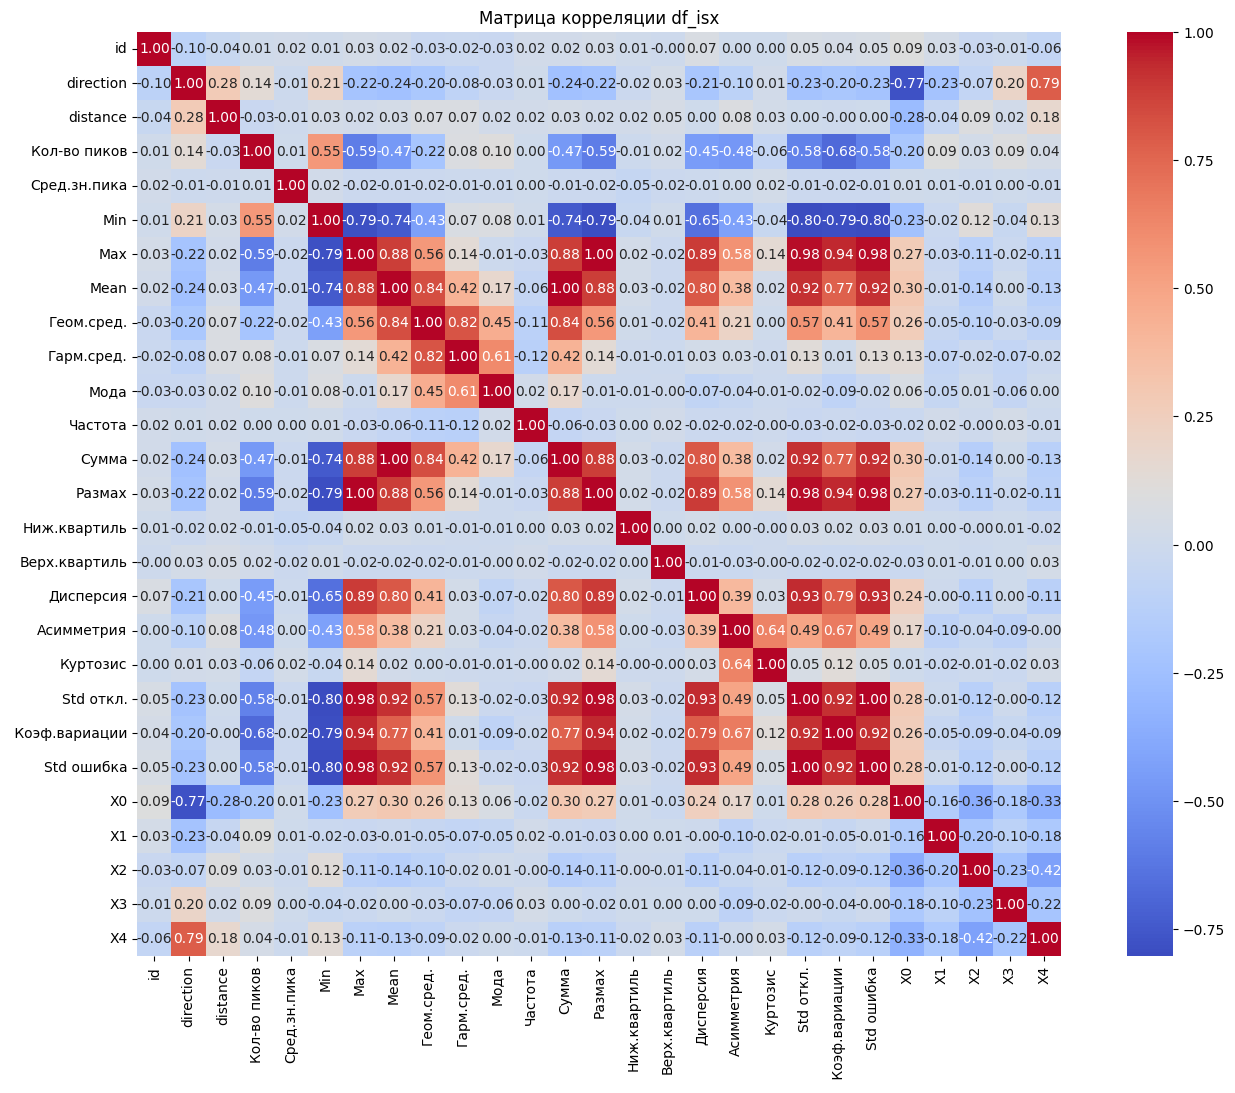

In [85]:
correlationMatrix(df_isx, 'df_isx', (17, 12))
# correlationMatrix(df, 'df')
# correlationMatrix(df_balance, 'df_balance')

Const-значения: Index([], dtype='object')


C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3588864463.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df.drop(columns=columns_to_drop, inplace=True)


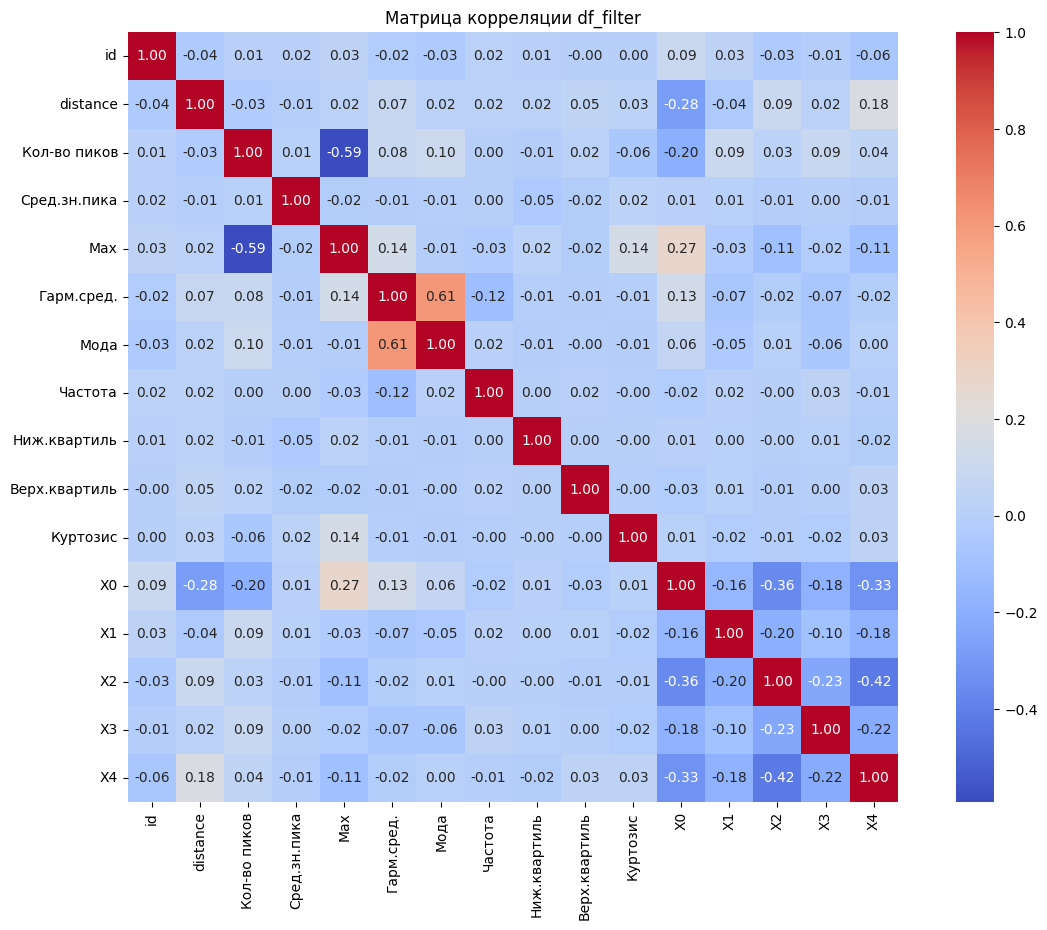

In [87]:
df_filter = df_isx[['id', 'distance', 'Кол-во пиков', 'Сред.зн.пика',
       'Max','Гарм.сред.', 'Мода', 'Частота', 'Ниж.квартиль', 'Верх.квартиль',
       'Куртозис', 'X0', 'X1', 'X2', 'X3', 'X4']]
correlationMatrix(df_filter, 'df_filter', (15, 10))

In [88]:
correlationFeatures(df_isx, 'df_isx', 10)

Features top 10 in df_isx:
0.10 - direction
0.09 - X0
0.07 - Дисперсия
0.06 - X4
0.05 - Std откл.
0.05 - Std ошибка
0.04 -  Коэф.вариации
0.04 - distance
0.03 - X2
0.03 - X1




# Выбор значимых признаков

In [89]:
df_isx.keys()

Index(['id', 'direction', 'distance', 'Кол-во пиков', 'Сред.зн.пика', 'Min',
       'Max', 'Mean', 'Геом.сред.', 'Гарм.сред.', 'Мода', 'Частота', 'Сумма',
       'Размах', 'Ниж.квартиль', 'Верх.квартиль', 'Дисперсия', 'Асимметрия',
       'Куртозис', 'Std откл.', ' Коэф.вариации', 'Std ошибка', 'X0', 'X1',
       'X2', 'X3', 'X4'],
      dtype='object')

In [90]:
feature_1 = ['Max', 'Mean', 'Std откл.', 'Асимметрия', 'Куртозис', 'id'] 
feature_2 = ['Max', 'Куртозис', 'Гарм.сред.', 'Дисперсия', 'Асимметрия', 'id'] 
feature_3 = ['Max', 'Куртозис', 'Гарм.сред.', 'Std откл.', 'Асимметрия', 'Ниж.квартиль', 'Верх.квартиль', 'id'] 
feature_4 = ['Max', 'Куртозис', 'Гарм.сред.', 'Std откл.', 'Асимметрия', 'X0', 'X1', 'X2', 'X3', 'X4', 'id'] 
feature_5 = ['Max', 'Куртозис', 'Гарм.сред.', 'Std откл.', 'Асимметрия', 'distance', 'id'] 
feature_6 = ['Max', 'Куртозис', 'Гарм.сред.', 'Std откл.', 'Асимметрия', 'Кол-во пиков', 'Сред.зн.пика', 'id'] 
feature_7 = ['Max', 'Куртозис', 'Гарм.сред.', 'X0', 'X1', 'X2', 'X3', 'X4', 'distance', 'Кол-во пиков', 'Сред.зн.пика', 'id'] 

In [91]:
# saveCsvFile(df[feature_1], file_data_out_feature)
# saveCsvFile(df[feature_2], file_data_out_feature_5)
# saveCsvFile(df[feature_3], file_data_out_feature_new_3)

### Поиск выбросов в признаках

In [92]:
# getAnamaliesInDF(df_isx)

In [93]:
# getAnamaliesInDF(df_isx_full)

# NN learning

In [113]:
def learningNN(str, scaler, data):
    y = data['id']  # Target variable
    X = data.drop('id', axis=1)  # Features

    if scaler:
        X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
    # if scaler:
    #     X_train = scaler.fit_transform(X_train)
    #     X_test = scaler.fit_transform(X_test)

    model = LogisticRegression(random_state=50, max_iter=5000)
    model = model.fit(X_train,y_train)
    y_predict = model.predict(X_test)

    len_round = 2
    accuracy = model.score(X_test, y_test)
    
    print(str, 
          round(precision_score(y_predict, np.array(y_test)), len_round), "     ", 
          round(recall_score(y_predict, np.array(y_test)), len_round), "     ", 
          round(accuracy_score(y_predict, np.array(y_test)), len_round), " --->  %.2f%%" % (accuracy * 100))

def learningDataVariants(data):
    learningNN('none   ', 0, data)
    learningNN('std    ', StandardScaler(), data)
    learningNN('minmax ', MinMaxScaler(), data)
    learningNN('robust ', RobustScaler(), data)  

In [114]:
print("        Precision", " Recall ", "  Accuracy   \n")

print('\n feature_1')
learningDataVariants(df_isx[feature_1])
print('\n feature_2')
learningDataVariants(df_isx[feature_2])
print('\n feature_3')
learningDataVariants(df_isx[feature_3])
print('\n feature_4')
learningDataVariants(df_isx[feature_4])
print('\n feature_5')
learningDataVariants(df_isx[feature_5])
print('\n feature_6')
learningDataVariants(df_isx[feature_6])
print('\n feature_7')
learningDataVariants(df_isx[feature_7])
print('\n df_isx')
learningDataVariants(df_isx)
print('\n df_filter')
learningDataVariants(df_filter)
print('\n df_balance')
learningDataVariants(df_balance)


        Precision  Recall    Accuracy   


 feature_1
none    0.84       0.57       0.57  --->  56.54%
std     0.85       0.57       0.56  --->  56.40%
minmax  0.98       0.57       0.58  --->  57.81%
robust  0.84       0.57       0.56  --->  56.12%

 feature_2
none    0.9       0.57       0.57  --->  57.38%
std     0.9       0.57       0.58  --->  57.67%
minmax  0.99       0.55       0.56  --->  55.70%
robust  0.9       0.57       0.58  --->  57.52%

 feature_3
none    0.88       0.56       0.55  --->  55.13%
std     0.87       0.56       0.55  --->  54.85%
minmax  0.99       0.56       0.57  --->  56.54%
robust  0.86       0.56       0.55  --->  54.71%

 feature_4
none    0.65       0.6       0.56  --->  56.40%
std     0.65       0.6       0.56  --->  56.40%
minmax  0.58       0.59       0.55  --->  54.85%
robust  0.65       0.6       0.57  --->  56.54%

 feature_5
none    0.86       0.56       0.55  --->  54.71%
std     0.75       0.57       0.55  --->  54.57%
minmax  0.77       0.5

### Оценка значимости признаков 

In [44]:
# Выборки для класса 1 и класса 2
data_class_1 = df[df['id'] == 1]
data_class_0 = df[df['id'] == 0]

data = df
data_features = data.drop('id', axis=1)
# data_features.keys()

In [45]:
results = pd.DataFrame(columns=['Feature', 't-statistic', 'p-value', 'status'])
for feature in data_features.columns:
    t_statistic, p_value = ttest_ind(data_class_1[feature], data_class_0[feature])
    status = p_value < 0.05  
    results = results.append({'Feature': feature, 't-statistic': round(t_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
# print(results)
status_results = results[results['status']]
print(status_results)

           Feature  t-statistic  p-value status
0        direction      -5.8983   0.0000   True
1         distance      -2.1220   0.0339   True
6              Max       1.9752   0.0483   True
16       Дисперсия       3.7604   0.0002   True
19       Std откл.       2.8990   0.0038   True
20   Коэф.вариации       2.3235   0.0202   True
21      Std ошибка       2.9007   0.0037   True


C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3466556109.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 't-statistic': round(t_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3466556109.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 't-statistic': round(t_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3466556109.py:5: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results = results.append({'Feature': feature, 't-stat

In [46]:
results = pd.DataFrame(columns=['Feature', 'u-statistic', 'p-value', 'status'])
for feature in data_features.columns:
    u_statistic, p_value =  stats.mannwhitneyu(data_class_1[feature], data_class_0[feature])
    status = p_value < 0.05 
    results = results.append({'Feature': feature, 'u-statistic': round(u_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
    # results = pd.concat([results, pd.DataFrame({'Feature': [feature], 
    #                                             'u-statistic': [round(u_statistic, 4)], 
    #                                             'p-value': [round(p_value, 4)], 
                                                # 'status': [status]})], ignore_index=True)

# print(results)
status_results = results[results['status']]
print(status_results)

C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3866125891.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'u-statistic': round(u_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3866125891.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'u-statistic': round(u_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3866125891.py:5: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results = results.append({'Feature': feature, 'u-stat

           Feature  u-statistic  p-value status
0        direction    1407552.0   0.0000   True
9       Гарм.сред.    1481122.0   0.0015   True
16       Дисперсия    1650897.0   0.0175   True
17      Асимметрия    1784601.5   0.0000   True
18        Куртозис    1333890.0   0.0000   True
19       Std откл.    1650956.5   0.0174   True
20   Коэф.вариации    1809863.5   0.0000   True
21      Std ошибка    1652595.0   0.0148   True


C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3866125891.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'u-statistic': round(u_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3866125891.py:5: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results = results.append({'Feature': feature, 'u-statistic': round(u_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_11172\3866125891.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'u-stat

# NN own

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import random

In [96]:
def trainNN(X_train, X_test, y_train, y_test, model, epochs, batch = 8): 
    model.compile(optimizer="adam", loss='binary_crossentropy',metrics=["accuracy"])
    model_name = [name for name, obj in globals().items() if obj is model][0]
    
    # history = model.fit(X_train, y_train, batch_size=8, epochs=10,validation_split=0.05, verbose=0)
    model.fit(X_train, y_train, batch_size=batch, epochs=epochs,validation_split=0.05, verbose=0)
    scores=model.evaluate(X_test, y_test, verbose=0)
    print(model_name, " Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

In [97]:
# # def models_init(size):
# print(size)
# keras.backend.clear_session()

# model_8_10_1 = Sequential([
#     keras.layers.Dense(8, input_dim=size, activation='relu'),
#     keras.layers.Dense(10, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model_32_128_1 = Sequential([
#     keras.layers.Dense(32, input_dim=size, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model_32_64_1 = Sequential([
#     keras.layers.Dense(32, input_dim=size, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model_32_64_64_1 = Sequential([
#     keras.layers.Dense(32, input_dim=size, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model_16_32_32_16 = Sequential([
#     keras.layers.Dense(16, input_dim=size, activation='relu'),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

### [feature_1]

In [98]:
data_f = df_isx[feature_1]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

(2840, 5)
model_8_10_1  Точность работы на тестовых данных: 63.57%
model_8_10_1  Точность работы на тестовых данных: 66.67%
model_32_128_1  Точность работы на тестовых данных: 62.17%
model_32_128_1  Точность работы на тестовых данных: 67.65%


### [feature_2]

In [ ]:
data_f = df_isx[feature_2]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

### [feature_3]

In [ ]:
data_f = df_isx[feature_3]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

### [feature_4]

In [ ]:
data_f = df_isx[feature_4]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

### [feature_7]

In [ ]:
data_f = df_isx[feature_7]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

### [df_filter]

In [99]:
data_f = df_filter
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 32)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 32)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

(2840, 15)
model_8_10_1  Точность работы на тестовых данных: 47.68%
model_8_10_1  Точность работы на тестовых данных: 46.41%
model_32_128_1  Точность работы на тестовых данных: 53.02%
model_32_128_1  Точность работы на тестовых данных: 58.65%


### [df_isx]

In [ ]:
data_f = df_isx
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 32)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 32)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

## scaler

In [ ]:
def NN_train(X_train, y_train, X_test, y_test, model, epochs, batch = 8): 
    model.compile(optimizer="adam", loss='binary_crossentropy',metrics=["accuracy"])

    model_name = [name for name, obj in globals().items() if obj is model][0]
    
    # history = model.fit(X_train, y_train, batch_size=8, epochs=10,validation_split=0.05, verbose=0)
    model.fit(X_train, y_train, batch_size=batch, epochs=epochs,validation_split=0.05, verbose=0)
    scores=model.evaluate(X_test, y_test, verbose=0)
    print(model_name, epochs, " Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

In [ ]:
data = df[feature_2]
y = data['id']  # Target variable
X = data.drop('id', axis=1)  # Features

X = StandardScaler().fit_transform(X)
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

keras.backend.clear_session()
np.random.seed(42)
model_std_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

NN_train(X_train, y_train, X_test, y_test, model_std_1, 10, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_1, 100, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_1, 1000, 32)

In [ ]:
data = df[feature_3]
y = data['id']  # Target variable
X = data.drop('id', axis=1)  # Features

X = StandardScaler().fit_transform(X)
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

keras.backend.clear_session()
np.random.seed(42)
model_std_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

NN_train(X_train, y_train, X_test, y_test, model_std_1, 10, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_1, 100, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_1, 1000, 32)

In [ ]:
data = df[feature_2]
y = data['id']  # Target variable
X = data.drop('id', axis=1)  # Features

X = StandardScaler().fit_transform(X)
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

keras.backend.clear_session()
np.random.seed(42)
model_std_3 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

NN_train(X_train, y_train, X_test, y_test, model_std_3, 10, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_3, 100, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_3, 1000, 32)

In [ ]:
data = df[feature_3]
y = data['id']  # Target variable
X = data.drop('id', axis=1)  # Features

X = StandardScaler().fit_transform(X)
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

keras.backend.clear_session()
np.random.seed(42)
model_std_3 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

NN_train(X_train, y_train, X_test, y_test, model_std_3, 10, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_3, 100, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_3, 1000, 32)